In [1]:
import pandas as pd
import seaborn as sns
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

#### Region is all south
#### 254 Counties

In [3]:
df = pd.read_csv('SDOH_County_TEXAS_Labeled.csv').drop(['Unnamed: 0', 'YEAR', 'STATE', 'STATEFIPS', 'TERRITORY', 'REGION', 'COUNTYFIPS'], axis=1)
df

,COUNTY,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,ACS_TOT_CIVIL_POP_ABOVE18,ACS_TOT_CIVIL_VET_POP_ABOVE25,...,POS_HOSP_AMBULANCE_RATE,POS_TOT_HOSP_CHEMO,POS_HOSP_CHEMO_RATE,POS_TOT_HOSP_ED,POS_HOSP_ED_RATE,POS_PCT_HOSP_FOR_PROFIT,POS_PCT_HOSP_NON_PROFIT,POS_PCT_HOSP_GOV,CEN_AIAN_NH_IND,AHRF_URC_2013
0,Anderson County,57917,57439,54873,48733,48101,2316,42328,46812,3510,...,0.0,0,0.00,3,0.05,80.56,19.44,0.00,0,NaN
1,Andrews County,18227,18010,16664,13599,13373,1141,10944,12635,638,...,0.0,0,0.00,1,0.05,37.50,25.00,37.50,0,0.0
2,Angelina County,87119,86498,81305,68688,67345,4580,57331,64863,5611,...,0.0,2,0.02,4,0.05,75.00,22.06,2.94,0,0.0
3,Aransas County,24220,23961,23077,20536,20312,1315,17811,19354,2040,...,0.0,0,0.00,0,0.00,66.67,33.33,0.00,0,1.0
4,Archer County,8754,8668,8287,7228,7134,466,6192,6842,499,...,0.0,0,0.00,1,0.11,50.00,25.00,25.00,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Wood County,45054,44659,42927,37956,37319,2008,32769,36405,4067,...,0.0,0,0.00,5,0.11,68.18,27.27,4.55,0,0.0
250,Yoakum County,8612,8503,7821,6211,6020,468,5074,5775,176,...,0.0,0,0.00,2,0.23,33.33,33.33,33.33,0,NaN
251,Young County,17961,17855,16930,14366,14081,836,12447,13593,937,...,0.0,0,0.00,3,0.17,63.16,10.53,26.32,0,NaN
252,Zapata County,14243,13909,12935,10196,9956,819,8032,9487,436,...,0.0,0,0.00,0,0.00,100.00,0.00,0.00,0,0.0


In [4]:
df.select_dtypes(include='object')

,COUNTY
0,Anderson County
1,Andrews County
2,Angelina County
3,Aransas County
4,Archer County
...,...
249,Wood County
250,Yoakum County
251,Young County
252,Zapata County


In [5]:
urban_rural_count = df['AHRF_URC_2013'].value_counts()
urban_rural_count

AHRF_URC_2013
1.0    95
0.0    71
Name: count, dtype: int64

In [6]:
for col in df.columns:
    print(f'Column {col}:', df[col].nunique())

Column COUNTY: 254
Column ACS_TOT_POP_WT: 253
Column ACS_TOT_POP_US_ABOVE1: 254
Column ACS_TOT_POP_ABOVE5: 254
Column ACS_TOT_POP_ABOVE15: 252
Column ACS_TOT_POP_ABOVE16: 253
Column ACS_TOT_POP_16_19: 243
Column ACS_TOT_POP_ABOVE25: 253
Column ACS_TOT_CIVIL_POP_ABOVE18: 252
Column ACS_TOT_CIVIL_VET_POP_ABOVE25: 241
Column ACS_TOT_OWN_CHILD_BELOW17: 252
Column ACS_TOT_WORKER_NWFH: 253
Column ACS_TOT_WORKER_HH: 254
Column ACS_TOT_CIVILIAN_LABOR: 253
Column ACS_TOT_CIVIL_EMPLOY_POP: 253
Column ACS_TOT_POP_POV: 253
Column ACS_TOT_CIVIL_NONINST_POP_POV: 253
Column ACS_TOT_CIVIL_POP_POV: 252
Column ACS_TOT_GRANDCHILDREN_GP: 235
Column ACS_TOT_HU: 253
Column ACS_TOT_HH: 252
Column ACS_AVG_HH_SIZE: 118
Column ACS_TOT_CIVIL_NONINST_POP: 254
Column ACS_TOT_CIVIL_VET_POP: 245
Column ACS_PCT_CHILD_DISAB: 209
Column ACS_PCT_DISABLE: 234
Column ACS_PCT_NONVET_DISABLE_18_64: 234
Column ACS_PCT_VET_DISABLE_18_64: 222
Column ACS_PCT_MALE: 205
Column ACS_PCT_FEMALE: 205
Column ACS_PCT_CTZ_US_BORN: 235
C

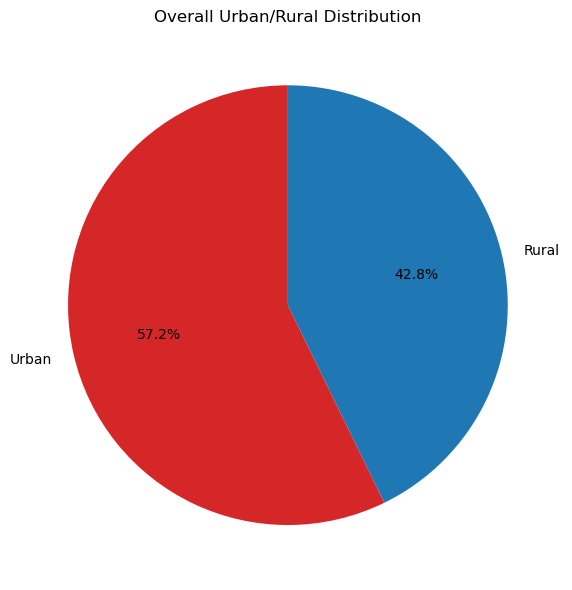

In [7]:
labels = urban_rural_count.index.map({1: 'Urban', 0: 'Rural'}).tolist()

# Plot the pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(urban_rural_count, labels=labels, autopct='%1.1f%%', colors=['#d62728', '#1f77b4'], startangle=90)
ax.set_title('Overall Urban/Rural Distribution')

plt.tight_layout()
#plt.savefig('figures/texas/overall_label_distribution.png', format='png', bbox_inches='tight')
plt.show()

In [10]:
mgv = pd.read_csv('MGV_Labeled.csv', low_memory=False)
mgv

,COUNTY,YEAR,BENE_GEO_CD,BENES_TOTAL_CNT,BENES_WTH_PTAPTB_CNT,BENES_FFS_CNT,BENES_MA_CNT,MA_PRTCPTN_RATE,BENE_AVG_AGE,BENE_FEML_PCT,...,PQI11_BCTRL_PNA_AGE_65_74,PQI11_BCTRL_PNA_AGE_GE_75,PQI12_UTI_AGE_LT_65,PQI12_UTI_AGE_65_74,PQI12_UTI_AGE_GE_75,PQI15_ASTHMA_AGE_LT_40,PQI16_LWRXTRMTY_AMPUTN_AGE_LT_65,PQI16_LWRXTRMTY_AMPUTN_AGE_65_74,PQI16_LWRXTRMTY_AMPUTN_AGE_GE_75,Urban
0,Anderson,2014,48001.0,9942,9069,6905,2164,0.2386,71,0.5513,...,0,0,0,0,0,0,0,0,0,0
1,Andrews,2014,48003.0,2096,1893,1558,335,0.1770,72,0.5552,...,0,0,0,0,0,0,0,0,0,1
2,Angelina,2014,48005.0,16708,15345,11495,3850,0.2509,70,0.5428,...,0,0,0,0,0,0,0,0,0,0
3,Aransas,2014,48007.0,7249,6653,4235,2418,0.3634,72,0.5164,...,0,0,0,0,0,0,0,0,0,0
4,Archer,2014,48009.0,1813,1696,1481,215,0.1268,72,0.5381,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,Wood,2022,48499.0,16074,14656,8049,6607,0.4508,74,0.5283,...,0,0,0,0,0,0,0,0,0,0
2291,Yoakum,2022,48501.0,1327,1165,731,434,0.3725,73,0.5144,...,0,0,0,0,0,0,0,0,0,1
2292,Young,2022,48503.0,4672,4215,3151,1064,0.2524,73,0.5363,...,0,0,0,0,0,0,0,0,0,0
2293,Zapata,2022,48505.0,2136,1821,811,1010,0.5546,72,0.5327,...,0,0,0,0,0,0,0,0,0,0


In [12]:
urban_rural_count = mgv['Urban'].value_counts()
urban_rural_count

Urban
0    2034
1     261
Name: count, dtype: int64